## Chapter 3 - Classification

#### MNIST

In [1]:
from sklearn.datasets import  fetch_openml
mnist = fetch_openml("mnist_784",version=1,as_frame=False)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#mnist.DESCR
print(mnist.data[0].shape)

(784,)


In [4]:
28*28

784

In [5]:
#mnist.feature_names

In [6]:
X,y = mnist["data"] , mnist["target"]
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

(784,)
(28, 28)


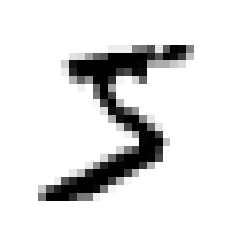

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
print(some_digit.shape)
some_digit_image = some_digit.reshape(28,28)
print(some_digit_image.shape)

plt.imshow(some_digit_image,cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [9]:
y[0]

'5'

In [10]:
def plot_digit(data):
    """plot digit"""
    plt.figure(figsize=(3,3))
    image = data.reshape(28,28)
    plt.imshow(image,cmap=mpl.cm.binary)
    plt.axis("off")
   

target :5


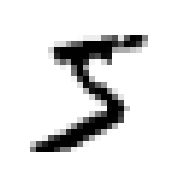

In [11]:
#visualization mnist datasets
pic_no = 0
example_images = X[pic_no]
target_images = y[pic_no]
print(f"target :{target_images}")
plot_digit(example_images)
plt.show()

In [12]:
#split datasets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Training a Binary Classifier

#### 5-detector
- Predicting between 2 classes , 5 and not-5

In [13]:
#Prepare data (cleaning)
import numpy as np
y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


In [14]:
#Training
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

[ True]


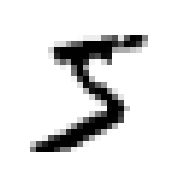

In [15]:
#Predicting
pic_predict = X[0]
print(sgd_clf.predict([pic_predict]))
plot_digit(pic_predict)

## Performance Measures

In [16]:
#Measuring Accuracy Using Cross-validation
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [17]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

confusion_matrix(y_train_5,y_train_pred)

In [ ]:
#perfactly case 
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

## Precision and Recall

In [ ]:
from sklearn.metrics import precision_score,recall_score

precision_score = precision_score(y_train_5,y_train_pred)
recall_score = recall_score(y_train_5,y_train_pred)

print(f"precision_score : {precision_score} ")
print(f"recall_score : {recall_score} ")

## F1 score

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_train_5,y_train_pred))

## Precision/Recall Trade-off

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
threshold = 8000 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

In [ ]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [ ]:
print(y_scores)

In [ ]:
threshold = 5000 #changable

y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

confusion_matrix(y_train_5,y_some_digit_pred)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

precision = 0.9 #changable
recall_90_precision = recalls[np.argmax(precisions >= precision)]
threshold_90_precision = thresholds[np.argmax(precisions >= precision)]

print('recal: ',recall_90_precision)
print('threshold: ',threshold_90_precision)

#trad off
threshold = threshold_90_precision
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

print('confusion_matrix :\n',confusion_matrix(y_train_5, y_some_digit_pred))

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., precision], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [precision,precision], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [precision], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                          # Not shown                                             # Not shown
plt.show()

## The ROC curve

In [ ]:
from sklearn.metrics import roc_curve

fpr,tpr, thresholds = roc_curve(y_train_5,y_scores)

In [ ]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate",fontsize=16)
    plt.ylabel("True positive rate(recall)",fontsize=16)
    plt.grid(True)

plot_roc_curve(fpr,tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]
print(fpr_90)
plt.plot([fpr_90,fpr_90],[0.,recall_90_precision],"r:") #red vertical
plt.plot([0.0,fpr_90],[recall_90_precision,recall_90_precision],"r:") #red holizontal
plt.plot([fpr_90],[recall_90_precision],"ro")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100,random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,cv=3,method="predict_proba")

In [ ]:
y_scores_forest = y_probas_forest[:,1] #score = proba of positive class
print(y_scores_forest)

In [ ]:
fpr_forest,tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

In [ ]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [ ]:
recall_90_precision

## Multiclass Classification

In [ ]:
# SVC  one vs one  training 45 binary classifier
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:10000],y_train[:10000])
svm_clf.predict([some_digit])


In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
#Predict classes
np.argmax(some_digit_scores)

In [ ]:
#Target name
svm_clf.classes_

In [ ]:
#mapping class 5
svm_clf.classes_[np.argmax(some_digit_scores)]

In [ ]:
#SVC one the rest 
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:1000],y_train[:1000])
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [ ]:
#SGD classififier 
#one vs the rest 
sgd_clf.fit(X_train,y_train)

In [ ]:
sgd_clf.decision_function([some_digit])

## Standardized

In [ ]:
#prepare model
#cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")

## Error analysis

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3,scoring="accuracy")
conf_mx = confusion_matrix(y_train,y_train_pred)
conf_mx

In [ ]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
cl_a, cl_b = 5, 8
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()